## **The Irreplaceables** - **_Serie A_**

Serie A 23/24 Season: Player Playing Time Analysis

In [1]:
#imports
import pandas as pd
import numpy as np

import bs4
import requests

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import seaborn as sns
from highlight_text import fig_text

from PIL import Image
import urllib

##### **Data Retrieval**

- https://fbref.com/en/comps/11/playingtime/Serie-A-Stats

In [3]:
url = 'https://fbref.com/en/comps/11/playingtime/Serie-A-Stats'
r = requests.get(url)
soup = bs4.BeautifulSoup(r.content, "html.parser")

table_id = """<div class="table_container" id="div_stats_playing_time">"""
table = (
   soup.find(attrs={"data-label": "Player Playing Time"})
       .find_next(string=lambda tag: 
          isinstance(tag, bs4.element.Comment) and table_id in tag
   )
)

pt_serieA_players = pd.read_html(table)[0]

In [5]:
pt_serieA_players.head()

Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0 Unnamed: 3_level_0   
                  Rk             Player             Nation                Pos   
0                  1     James Abankwah             ie IRL                 DF  \
1                  2      Tammy Abraham            eng ENG                 FW   
2                  3     Salim Abubakar             ne NIG                 MF   
3                  4   Francesco Acerbi             it ITA                 DF   
4                  5    Marius Adamonis             lt LTU                 GK   

  Unnamed: 4_level_0 Unnamed: 5_level_0 Unnamed: 6_level_0 Playing Time         
               Squad                Age               Born           MP   Min   
0            Udinese                 19               2004            0   NaN  \
1               Roma                 25               1997            8   242   
2           Sassuolo                 20               2003            0   NaN   
3              Inter                 35               1988           29  2388   
4              Lazio                 26               1997            0   NaN   

         ... Team Success                    Team Success (xG)                
  Mn/MP  ...         onGA  +/-  +/-90 On-Off              onxG onxGA  xG+/-   
0   NaN  ...          NaN  NaN    NaN    NaN               NaN   NaN    NaN  \
1    30  ...            4    0   0.00  -0.54               3.6   5.1   -1.5   
2   NaN  ...          NaN  NaN    NaN    NaN               NaN   NaN    NaN   
3    82  ...           19  +36  +1.36  -1.35              52.2  23.3  +28.9   
4   NaN  ...          NaN  NaN    NaN    NaN               NaN   NaN    NaN   

                 Unnamed: 29_level_0  
  xG+/-90 On-Off             Matches  
0     NaN    NaN             Matches  
1   -0.57  -0.89             Matches  
2     NaN    NaN             Matches  
3   +1.09  -0.50             Matches  
4     NaN    NaN             Matches  

[5 rows x 30 columns]

In [7]:
pt_serieA_players.columns = [' '.join(col).strip() for col in pt_serieA_players.columns]

# create a list with new column names
new_columns = []
for col in pt_serieA_players.columns:
    if 'level_0' in col:
        new_col = col.split()[-1]  # takes the last name
    else:
        new_col = col
    new_columns.append(new_col)

# rename columns
pt_serieA_players.columns = new_columns

pt_serieA_players.head()

,Rk,Player,Nation,Pos,Squad,Age,Born,Playing Time MP,Playing Time Min,Playing Time Mn/MP,...,Team Success onGA,Team Success +/-,Team Success +/-90,Team Success On-Off,Team Success (xG) onxG,Team Success (xG) onxGA,Team Success (xG) xG+/-,Team Success (xG) xG+/-90,Team Success (xG) On-Off,Matches
0,1,James Abankwah,ie IRL,DF,Udinese,19,2004,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Matches
1,2,Tammy Abraham,eng ENG,FW,Roma,25,1997,8,242,30,...,4,0,0.00,-0.54,3.6,5.1,-1.5,-0.57,-0.89,Matches
2,3,Salim Abubakar,ne NIG,MF,Sassuolo,20,2003,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Matches
3,4,Francesco Acerbi,it ITA,DF,Inter,35,1988,29,2388,82,...,19,+36,+1.36,-1.35,52.2,23.3,+28.9,+1.09,-0.50,Matches
4,5,Marius Adamonis,lt LTU,GK,Lazio,26,1997,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Matches


In [9]:
# clean data
pt_serieA_players['Age'] = pt_serieA_players['Age'].str[:2]
pt_serieA_players['Position'] = pt_serieA_players['Pos'].str[:2]
pt_serieA_players['Nation'] = pt_serieA_players['Nation'].str.split(' ').str.get(1)
pt_serieA_players = pt_serieA_players.drop(columns=['Rk', 'Pos', 'Matches'])

pt_serieA_players.head()

,Player,Nation,Squad,Age,Born,Playing Time MP,Playing Time Min,Playing Time Mn/MP,Playing Time Min%,Playing Time 90s,...,Team Success onGA,Team Success +/-,Team Success +/-90,Team Success On-Off,Team Success (xG) onxG,Team Success (xG) onxGA,Team Success (xG) xG+/-,Team Success (xG) xG+/-90,Team Success (xG) On-Off,Position
0,James Abankwah,IRL,Udinese,19,2004,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DF
1,Tammy Abraham,ENG,Roma,25,1997,8,242,30,7.1,2.7,...,4,0,0.00,-0.54,3.6,5.1,-1.5,-0.57,-0.89,FW
2,Salim Abubakar,NIG,Sassuolo,20,2003,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MF
3,Francesco Acerbi,ITA,Inter,35,1988,29,2388,82,69.8,26.5,...,19,+36,+1.36,-1.35,52.2,23.3,+28.9,+1.09,-0.50,DF
4,Marius Adamonis,LTU,Lazio,26,1997,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GK


In [10]:
# save as csv
pt_serieA_players.to_csv('../data/serieA_23-24_players_pt.csv',index=False)

##### **Data Preparation**

In [2]:
pt_serieA_players = pd.read_csv('../data/serieA_23-24_players_pt.csv')

In [3]:
print(pt_serieA_players.shape)
print('')
print(pt_serieA_players.columns)

(818, 28)

Index(['Player', 'Nation', 'Squad', 'Age', 'Born', 'Playing Time MP',
       'Playing Time Min', 'Playing Time Mn/MP', 'Playing Time Min%',
       'Playing Time 90s', 'Starts Starts', 'Starts Mn/Start', 'Starts Compl',
       'Subs Subs', 'Subs Mn/Sub', 'Subs unSub', 'Team Success PPM',
       'Team Success onG', 'Team Success onGA', 'Team Success +/-',
       'Team Success +/-90', 'Team Success On-Off', 'Team Success (xG) onxG',
       'Team Success (xG) onxGA', 'Team Success (xG) xG+/-',
       'Team Success (xG) xG+/-90', 'Team Success (xG) On-Off', 'Position'],
      dtype='object')


In [6]:
# select only relevant columns
pt_serieA_players = pt_serieA_players[['Player', 'Nation', 'Squad', 'Age', 'Born', 'Playing Time MP', 'Playing Time Min', 'Starts Starts', 'Subs Subs', 'Subs unSub', 'Position']]

In [7]:
# rename columns
pt_serieA_players.rename(columns={'Playing Time MP': 'MP', 'Playing Time Min': 'Min', 'Starts Starts': 'Starts', 'Subs Subs': 'Subs', 'Subs unSub': 'unSub'}, inplace=True)
print(pt_serieA_players.columns)

Index(['Player', 'Nation', 'Squad', 'Age', 'Born', 'MP', 'Min', 'Starts',
       'Subs', 'unSub', 'Position'],
      dtype='object')


C:\Users\FC\AppData\Local\Temp\ipykernel_11156\3506027986.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pt_serieA_players.rename(columns={'Playing Time MP': 'MP', 'Playing Time Min': 'Min', 'Starts Starts': 'Starts', 'Subs Subs': 'Subs', 'Subs unSub': 'unSub'}, inplace=True)


In [8]:
columns_to_convert = ['Age', 'Born', 'MP', 'Min', 'Starts', 'Subs', 'unSub']

# convert columns to numeric
pt_serieA_players[columns_to_convert] = pt_serieA_players[columns_to_convert].apply(pd.to_numeric, errors='coerce', downcast='integer')

C:\Users\FC\AppData\Local\Temp\ipykernel_11156\1437473997.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pt_serieA_players[columns_to_convert] = pt_serieA_players[columns_to_convert].apply(pd.to_numeric, errors='coerce', downcast='integer')


In [9]:
columns_to_int = ['Age', 'Born', 'MP', 'Min', 'Starts', 'Subs', 'unSub']

pt_serieA_players[columns_to_int] = pt_serieA_players[columns_to_int].fillna(0).astype(int)

C:\Users\FC\AppData\Local\Temp\ipykernel_11156\2916454180.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pt_serieA_players[columns_to_int] = pt_serieA_players[columns_to_int].fillna(0).astype(int)


In [10]:
pt_serieA_players.dtypes

Player      object
Nation      object
Squad       object
Age          int32
Born         int32
MP           int32
Min          int32
Starts       int32
Subs         int32
unSub        int32
Position    object
dtype: object

In [15]:
columns_to_convert = ['Age', 'Born', 'Playing Time MP',
       'Playing Time Min', 'Playing Time Mn/MP', 'Playing Time Min%',
       'Playing Time 90s', 'Starts Starts', 'Starts Mn/Start', 'Starts Compl',
       'Subs Subs', 'Subs Mn/Sub', 'Subs unSub', 'Team Success PPM',
       'Team Success onG', 'Team Success onGA', 'Team Success +/-',
       'Team Success +/-90', 'Team Success On-Off', 'Team Success (xG) onxG',
       'Team Success (xG) onxGA', 'Team Success (xG) xG+/-',
       'Team Success (xG) xG+/-90', 'Team Success (xG) On-Off']

# convert columns to numeric
pt_serieA_players[columns_to_convert] = pt_serieA_players[columns_to_convert].apply(pd.to_numeric, errors='coerce')

In [11]:
pt_serieA_players.isnull().sum()

Player       0
Nation      35
Squad        0
Age          0
Born         0
MP           0
Min          0
Starts       0
Subs         0
unSub        0
Position     0
dtype: int64

In [16]:
#pt_serieA_players[pt_serieA_players['Nation'].isnull()]

In [14]:
# remove header rows with no info
pt_serieA_players = pt_serieA_players.dropna(subset=['Nation'])

##### **Data Modeling**

**The Irreplaceables** - Serie A 2023/24

In [17]:
# add a new column to show the number of matches the player made it into the squad
pt_serieA_players['InSquad'] = pt_serieA_players['MP'] + pt_serieA_players['unSub']

In [25]:
# add a new column with formatted string for the Starts and InSquad data
pt_serieA_players['Starts/InSquad'] = [f'{x}/{y}' for x,y in zip(pt_serieA_players['Starts'], pt_serieA_players['InSquad'])]

In [26]:
# sort the players based on the Min column
pt_serieA_players_sorted = pt_serieA_players.sort_values(by='Min', ascending=False).reset_index(drop=True)
pt_serieA_players_sorted

,Player,Nation,Squad,Age,Born,MP,Min,Starts,Subs,unSub,Position,InSquad,Starts/InSquad
0,Wladimiro Falcone,ITA,Lecce,28,1995,38,3420,38,0,0,GK,38,38/38
1,Sebastiano Luperto,ITA,Empoli,26,1996,38,3406,38,0,0,DF,38,38/38
2,Lorenzo Montipò,ITA,Hellas Verona,27,1996,37,3330,37,0,0,GK,37,37/37
3,Federico Baschirotto,ITA,Lecce,26,1996,37,3294,37,0,0,DF,37,37/37
4,Bryan Cristante,ITA,Roma,28,1995,37,3289,37,0,0,MF,37,37/37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
778,Seb Loeffen,NED,Sassuolo,19,2004,0,0,0,0,1,DF,1,0/1
779,Hirving Lozano,MEX,Napoli,28,1995,0,0,0,0,2,FW,2,0/2
780,Youssef Maleh,MAR,Lecce,24,1998,0,0,0,0,2,MF,2,0/2
781,Joel Malusà,ITA,Udinese,16,2007,0,0,0,0,6,GK,6,0/6


In [27]:
# filter to include only the first ten rows
pt_serieA_players_top10 = pt_serieA_players_sorted.iloc[:11]
pt_serieA_players_top10

,Player,Nation,Squad,Age,Born,MP,Min,Starts,Subs,unSub,Position,InSquad,Starts/InSquad
0,Wladimiro Falcone,ITA,Lecce,28,1995,38,3420,38,0,0,GK,38,38/38
1,Sebastiano Luperto,ITA,Empoli,26,1996,38,3406,38,0,0,DF,38,38/38
2,Lorenzo Montipò,ITA,Hellas Verona,27,1996,37,3330,37,0,0,GK,37,37/37
3,Federico Baschirotto,ITA,Lecce,26,1996,37,3294,37,0,0,DF,37,37/37
4,Bryan Cristante,ITA,Roma,28,1995,37,3289,37,0,0,MF,37,37/37
5,Stanislav Lobotka,SVK,Napoli,28,1994,38,3282,38,0,0,MF,38,38/38
6,Vanja Milinković-Savić,SRB,Torino,26,1997,36,3240,36,0,1,GK,37,36/37
7,Josep Martinez,ESP,Genoa,25,1998,36,3239,36,0,1,GK,37,36/37
8,Nehuén Pérez,ARG,Udinese,23,2000,36,3238,36,0,0,DF,36,36/36
9,Walace,BRA,Udinese,28,1995,37,3238,37,0,0,MF,37,37/37


##### **Data Visualization**

In [50]:
serieA_teamID = {
    "Atalanta": 8524,
    "Bologna": 9857,
    "Cagliari": 8529,
    "Empoli": 8534,
    "Fiorentina": 8535,
    "Frosinone": 9891,
    "Genoa": 10233,
    "Hellas Verona": 9876,
    "Inter": 8636,
    "Juventus": 9885,
    "Lazio": 8543,
    "Lecce": 9888,
    "Milan": 8564,
    "Monza": 6504,
    "Napoli": 9875,
    "Roma": 8686,
    "Salernitana": 6480,
    "Sassuolo": 7943,
    "Torino": 9804,
    "Udinese": 8600
}

In [75]:
def ax_logo(team_name, ax):
    if team_name in serieA_teamID:
        team_id = serieA_teamID[team_name]
        fotmob_url = 'https://images.fotmob.com/image_resources/logo/teamlogo/'
        club_icon = Image.open(urllib.request.urlopen(f'{fotmob_url}{team_id}.png'))
        ax.imshow(club_icon)
    ax.axis('off')
    return ax

In [28]:
# function that takes an integer and an axes and plots a battery chart
def minutes_battery(minutes, ax):
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.barh([0.5], [1], fc='white', ec='black', height=0.25)
    ax.barh([0.5], [minutes/(90*38)], fc='#00529F', height=0.25)
    ax.annotate(
        f'{minutes/(90*38):.0%}',
        xy=(minutes/(90*38), 0.5),
        xytext=(-9, 0),
        textcoords='offset points',
        weight='bold',
        color='#EFE9E6',
        va='center',
        ha='center',
        size=5
    )
    ax.set_axis_off()
    return ax

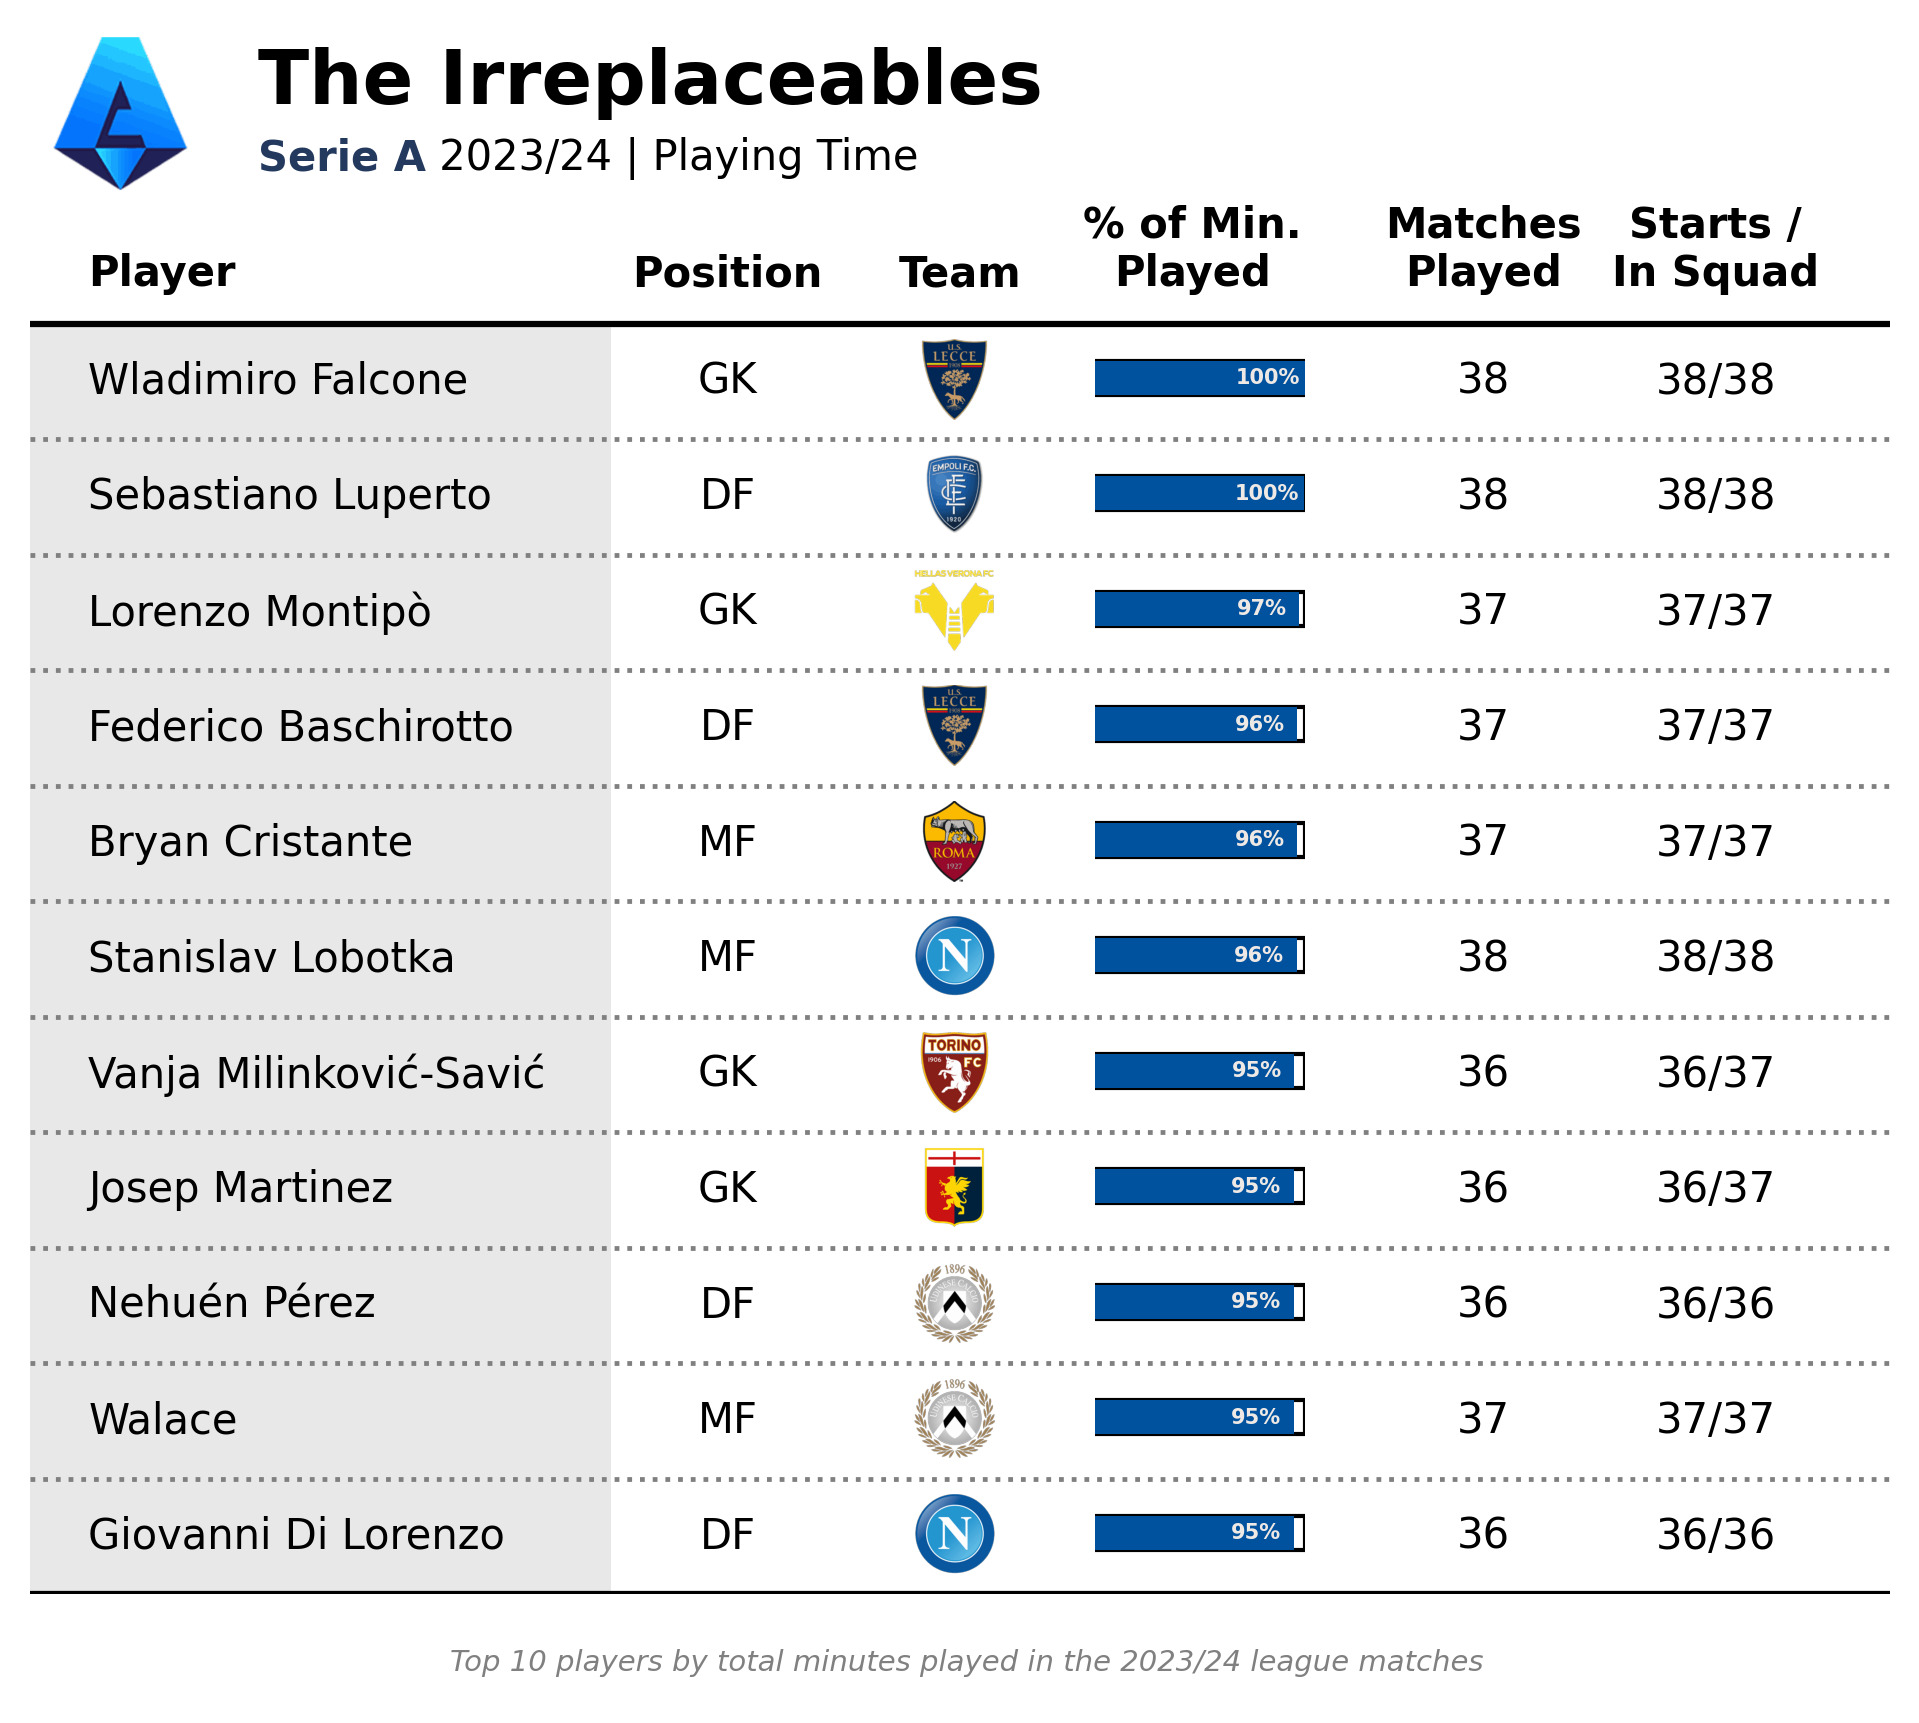

In [95]:
fig = plt.figure(figsize=(8, 6), dpi=300)
ax = plt.subplot()

ncols = 7
nrows = pt_serieA_players_top10.shape[0]

ax.set_xlim(0, ncols + 1)
ax.set_ylim(0, nrows + 1)

positions = [0.25, 3, 4, 5, 6.25, 7.25]
columns = ['Player', 'Position', 'Squad', 'Min', 'MP', 'Starts/InSquad']

# add table's main text
for i in range(nrows):
    for j, column in enumerate(columns):
        ha = 'left' if j == 0 else 'center'
        text_label = f'{pt_serieA_players_top10[column].iloc[i]}'
        weight = 'normal'
        if column == 'Squad':  # skip printing team names
            continue
        ax.annotate(
            text_label,
            xy=(positions[j], nrows - i - 0.5),
            ha=ha,
            va='center',
            weight=weight
        )

ax_width = 0.7  # relative width of the battery bars
ax_height = 10 / nrows  # relative height of the battery bars
vertical_space = 0.23  # additional vertical space between each bar

# plot the battery bars for each row
for x in range(nrows):
    ax_coords = [4.55, nrows - x - 2.025 + (x * vertical_space)] # to reverse bars, before ax_coords = [4.9, x + 1.25 + (x * vertical_space)]
    bar_ax = fig.add_axes(
        [ax_coords[0] / (ncols + 1), ax_coords[1] / (nrows + 1), ax_width / (ncols + 1), ax_height / (nrows + 1)]
    )
    minutes_battery(pt_serieA_players_top10['Min'].iloc[x], bar_ax)

for x in range(nrows):
    ax_coords = [3.9, nrows - x - 1.85 + (x * vertical_space)]
    team_ax = fig.add_axes(
        [ax_coords[0] / (ncols + 1), ax_coords[1] / (nrows + 1), 0.045, 0.045]
    )
    ax_logo(pt_serieA_players_top10['Squad'].iloc[x], team_ax)

# add column names
column_names = ['Player', 'Position', 'Team', '% of Min.\nPlayed', 'Matches\nPlayed', 'Starts /\nIn Squad']
for index, c in enumerate(column_names):
    ha = 'left' if index == 0 else 'center'
    ax.annotate(
        c,
        xy=(positions[index], nrows + 0.25),
        ha=ha,
        va='bottom',
        weight='bold'
    )

# add dividing lines
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [nrows, nrows], lw=1.5, color='black', marker='', zorder=4)
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [0, 0], lw=1.5, color='black', marker='', zorder=4)
for x in range(1, nrows):
    ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [x, x], lw=1.15, color='gray', ls=':', zorder=3, marker='')

ax.fill_between(
    x=[0, 2.5],
    y1=nrows,
    y2=0,
    color='lightgrey',
    alpha=0.5,
    ec='None'
)

ax.set_axis_off()

# add logo
fotmob_url_league = "https://images.fotmob.com/image_resources/logo/leaguelogo/"

logo_ax = fig.add_axes([0.12, 0.89, 0.085, 0.085], zorder=1)
league_icon = Image.open(urllib.request.urlopen(f"{fotmob_url_league}55.png"))
logo_ax.imshow(league_icon)
logo_ax.axis("off")

# title and subtitle for the legend
fig_text(
    x=0.22, y=0.97,
    s="The Irreplaceables",
    color = "black",
    weight = "bold",
    size = 18,
    annotationbbox_kw={"xycoords": "figure fraction"}
)

fig_text(
    x=0.22, y=.92,
    s="<Serie A> 2023/24 | Playing Time",
    highlight_textprops=[
        {"color": "#23395D", "weight": "bold"}
        ],
    color="black",
    size=10,
    annotationbbox_kw={"xycoords": "figure fraction"}
)

fig_text(
    x=0.3, y=0.08,
    s="Top 10 players by total minutes played in the 2023/24 league matches",
    color="grey",
    size=7,
    fontstyle="italic",
    annotationbbox_kw={"xycoords": "figure fraction"}
)

plt.savefig(
    '../figures/SerieA_23-24-pt.png',
    dpi=300,
    facecolor = "white",
    bbox_inches='tight',
    edgecolor="none"
)